# ANALISIS DE ESTACIONES: CLUSTERS SIN ESTANDARIZACION

In [20]:
import pandas as pd

# Cargando el archivo CSV
file_path = './EstacionesTxt/datos2000-2021.csv'

#Incluir Latitud y Longitud
data = pd.read_csv(file_path)

# No Incluir Latitud y Longitud
# data = pd.read_csv(file_path, usecols=lambda column: column not in ['Latitud', 'Longitud'])

# Mostrando las primeras filas para entender la estructura de los datos
data.head()

,Estacion,precEne,precFeb,precMar,precAbr,precMay,precJun,precJul,precAgo,precSep,...,tempMinJun,tempMinJul,tempMinAgo,tempMinSep,tempMinOct,tempMinNov,tempMinDic,Latitud,Longitud,Grupo
0,EstacionAgs,14.066,9.4222,5.2783,7.4342,17.962,90.897,125.42,117.740,92.461,...,15.5200,14.7180,14.6060,14.0690,11.3790,7.6483,5.5909,21.896,-102.309,1
1,EstacionAgs2,9.416,15.1170,7.1692,7.9846,19.752,107.240,125.69,115.100,97.483,...,14.3820,13.5310,13.3640,11.1290,8.9059,5.7812,3.4615,21.906,-102.265,1
2,EstacionAlamitosCampamento,18.823,22.3350,14.3000,6.2428,29.318,134.210,165.95,145.060,127.790,...,9.6760,9.5647,9.6466,9.8021,6.7424,4.1742,2.3754,22.178,-102.586,2
3,EstacionArroyoHondo,12.750,18.9580,3.5454,2.2307,16.058,99.015,102.54,89.446,89.338,...,9.1218,9.4489,8.1029,8.1961,6.2220,1.6666,0.3980,22.183,-102.208,3
4,EstacionCalvillito,15.108,10.7220,5.4631,5.9891,22.318,92.367,127.24,112.580,95.897,...,12.2660,12.1010,11.7490,11.1140,7.4023,3.4650,1.3783,21.835,-102.183,3


In [21]:
# Obteniendo los nombres de las columnas para identificar la columna a excluir
column_names = data.columns
column_names
# Eliminando la columna 'Estacion ' con el espacio al final
#data_clustering = data.drop(['Estacion','Latitud','Longitud'], axis=1)

data_clustering = data.drop(['Estacion','evaEne','evaFeb','evaMar','evaAbr','evaMay','evaJun','evaJul','evaAgo','evaSep','evaOct','evaNov','evaDic'], axis=1)

# Verificando si hay valores faltantes en el conjunto de datos
missing_values = data_clustering.isnull().sum()

missing_values


precEne       0
precFeb       0
precMar       0
precAbr       0
precMay       0
precJun       0
precJul       0
precAgo       0
precSep       0
precOct       0
precNov       0
precDic       0
tempMaxEne    0
tempMaxFeb    0
tempMaxMar    0
tempMaxAbr    0
tempMaxMay    0
tempMaxJun    0
tempMaxJul    0
tempMaxAgo    0
tempMaxSep    0
tempMaxOct    0
tempMaxNov    0
tempMaxDic    0
tempMinEne    0
tempMinFeb    0
tempMinMar    0
tempMinAbr    0
tempMinMay    0
tempMinJun    0
tempMinJul    0
tempMinAgo    0
tempMinSep    0
tempMinOct    0
tempMinNov    0
tempMinDic    0
Latitud       0
Longitud      0
Grupo         0
dtype: int64

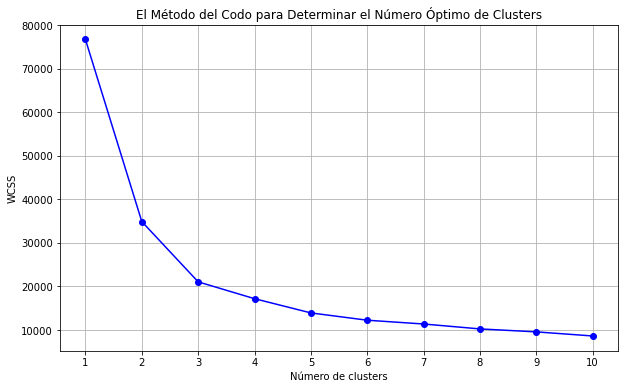

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Rango de número de clusters a probar
range_clusters = range(1, 11)

# Lista para almacenar la suma de los cuadrados dentro del grupo para cada número de clusters
wcss = []

# Calculando WCSS para cada número de clusters
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(data_clustering)
    wcss.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, wcss, marker='o', linestyle='-', color='b')
plt.title('El Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.xticks(range_clusters)
plt.grid(True)
plt.show()


In [23]:
# Realizando el análisis de clustering con 4 clusters
kmeans_optimo = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans_optimo.fit_predict(data_clustering)

# Añadiendo la asignación de cluster al conjunto de datos original para análisis
data_clustered = data.copy()
data_clustered['Cluster'] = clusters

# Mostrando las primeras filas del conjunto de datos con la asignación de cluster
data_clustered.head()


C:\Users\carli\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Estacion,precEne,precFeb,precMar,precAbr,precMay,precJun,precJul,precAgo,precSep,...,tempMinJul,tempMinAgo,tempMinSep,tempMinOct,tempMinNov,tempMinDic,Latitud,Longitud,Grupo,Cluster
0,EstacionAgs,14.066,9.4222,5.2783,7.4342,17.962,90.897,125.42,117.740,92.461,...,14.7180,14.6060,14.0690,11.3790,7.6483,5.5909,21.896,-102.309,1,1
1,EstacionAgs2,9.416,15.1170,7.1692,7.9846,19.752,107.240,125.69,115.100,97.483,...,13.5310,13.3640,11.1290,8.9059,5.7812,3.4615,21.906,-102.265,1,1
2,EstacionAlamitosCampamento,18.823,22.3350,14.3000,6.2428,29.318,134.210,165.95,145.060,127.790,...,9.5647,9.6466,9.8021,6.7424,4.1742,2.3754,22.178,-102.586,2,2
3,EstacionArroyoHondo,12.750,18.9580,3.5454,2.2307,16.058,99.015,102.54,89.446,89.338,...,9.4489,8.1029,8.1961,6.2220,1.6666,0.3980,22.183,-102.208,3,0
4,EstacionCalvillito,15.108,10.7220,5.4631,5.9891,22.318,92.367,127.24,112.580,95.897,...,12.1010,11.7490,11.1140,7.4023,3.4650,1.3783,21.835,-102.183,3,1


In [24]:
# Calculando los valores medios de cada variable para cada cluster
cluster_means = data_clustered['Cluster'].mean()

cluster_means


0.75

C:\Users\carli\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\carli\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\carli\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\carli\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



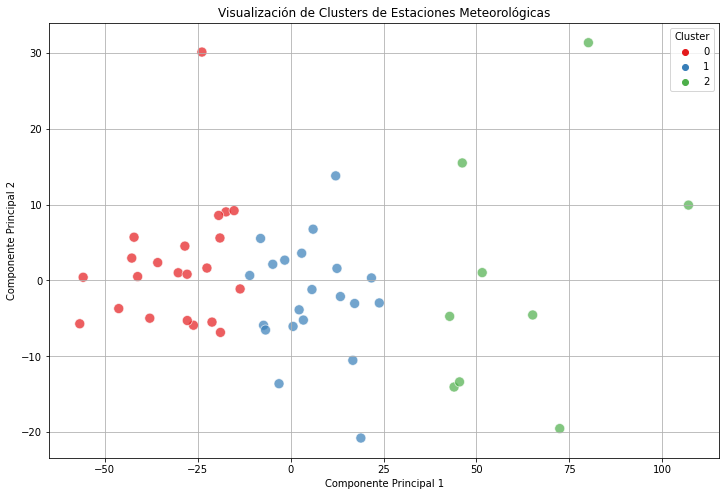

In [25]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduciendo la dimensionalidad para poder visualizar los clusters
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_clustering)

# Creando un DataFrame para la visualización
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

# Gráfico de los clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='Set1', s=100, alpha=0.7)
plt.title('Visualización de Clusters de Estaciones Meteorológicas')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [26]:
import plotly.express as px

# Añadiendo los nombres de las estaciones al DataFrame para la visualización
df_pca['Estacion'] = data['Estacion']

# Gráfico interactivo con Plotly
fig = px.scatter(df_pca, x='PC1', y='PC2', color='Cluster', 
                 hover_data=['Estacion'], 
                 title='Visualización Interactiva de Clusters de Estaciones Meteorológicas',
                 labels={'PC1': 'Componente Principal 1', 'PC2': 'Componente Principal 2'})
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')))
fig.show()


# ANALISIS DE ESTACIONES: CLUSTERS EN MAPA SIN ESTANDARIZACION

In [27]:
import pandas as pd
from sklearn.cluster import KMeans

# Cargar el archivo CSV
file_path_csv = './EstacionesTxt/datos2000-2021.csv'
data_with_coords = pd.read_csv(file_path_csv)

# Verificamos las primeras filas del conjunto de datos para asegurarnos de que se ha cargado correctamente
data_with_coords.head()

,Estacion,precEne,precFeb,precMar,precAbr,precMay,precJun,precJul,precAgo,precSep,...,tempMinJun,tempMinJul,tempMinAgo,tempMinSep,tempMinOct,tempMinNov,tempMinDic,Latitud,Longitud,Grupo
0,EstacionAgs,14.066,9.4222,5.2783,7.4342,17.962,90.897,125.42,117.740,92.461,...,15.5200,14.7180,14.6060,14.0690,11.3790,7.6483,5.5909,21.896,-102.309,1
1,EstacionAgs2,9.416,15.1170,7.1692,7.9846,19.752,107.240,125.69,115.100,97.483,...,14.3820,13.5310,13.3640,11.1290,8.9059,5.7812,3.4615,21.906,-102.265,1
2,EstacionAlamitosCampamento,18.823,22.3350,14.3000,6.2428,29.318,134.210,165.95,145.060,127.790,...,9.6760,9.5647,9.6466,9.8021,6.7424,4.1742,2.3754,22.178,-102.586,2
3,EstacionArroyoHondo,12.750,18.9580,3.5454,2.2307,16.058,99.015,102.54,89.446,89.338,...,9.1218,9.4489,8.1029,8.1961,6.2220,1.6666,0.3980,22.183,-102.208,3
4,EstacionCalvillito,15.108,10.7220,5.4631,5.9891,22.318,92.367,127.24,112.580,95.897,...,12.2660,12.1010,11.7490,11.1140,7.4023,3.4650,1.3783,21.835,-102.183,3


In [28]:
# Preparando los datos para el clustering, excluyendo las columnas 'Latitud', 'Longitud' y 'Estacion'

#Sin incluir Latitud y Longitud
#data_for_clustering = data_with_coords.drop(['Estacion', 'Latitud', 'Longitud'], axis=1)

#Incluir Latitud y Longitud
data_for_clustering = data_with_coords.drop(['Estacion','evaEne','evaFeb','evaMar','evaAbr','evaMay','evaJun','evaJul','evaAgo','evaSep','evaOct','evaNov','evaDic'], axis=1)

# Entrenando el modelo K-Means con 4 clusters, como se hizo en el notebook del usuario
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_for_clustering)

# Añadiendo la asignación de cluster al conjunto de datos original
data_with_coords['Cluster'] = clusters

# Mostrando las primeras filas con la asignación de cluster para verificar
data_with_coords.head()


C:\Users\carli\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Estacion,precEne,precFeb,precMar,precAbr,precMay,precJun,precJul,precAgo,precSep,...,tempMinJul,tempMinAgo,tempMinSep,tempMinOct,tempMinNov,tempMinDic,Latitud,Longitud,Grupo,Cluster
0,EstacionAgs,14.066,9.4222,5.2783,7.4342,17.962,90.897,125.42,117.740,92.461,...,14.7180,14.6060,14.0690,11.3790,7.6483,5.5909,21.896,-102.309,1,1
1,EstacionAgs2,9.416,15.1170,7.1692,7.9846,19.752,107.240,125.69,115.100,97.483,...,13.5310,13.3640,11.1290,8.9059,5.7812,3.4615,21.906,-102.265,1,1
2,EstacionAlamitosCampamento,18.823,22.3350,14.3000,6.2428,29.318,134.210,165.95,145.060,127.790,...,9.5647,9.6466,9.8021,6.7424,4.1742,2.3754,22.178,-102.586,2,2
3,EstacionArroyoHondo,12.750,18.9580,3.5454,2.2307,16.058,99.015,102.54,89.446,89.338,...,9.4489,8.1029,8.1961,6.2220,1.6666,0.3980,22.183,-102.208,3,0
4,EstacionCalvillito,15.108,10.7220,5.4631,5.9891,22.318,92.367,127.24,112.580,95.897,...,12.1010,11.7490,11.1140,7.4023,3.4650,1.3783,21.835,-102.183,3,1


In [29]:
import folium

# Calculando la ubicación promedio de todas las estaciones para centrar el mapa
lat_promedio = data_with_coords['Latitud'].mean()
long_promedio = data_with_coords['Longitud'].mean()

# Creando un mapa centrado en la ubicación promedio
mapa = folium.Map(location=[lat_promedio, long_promedio], zoom_start=10)

# Colores para los diferentes clusters
colores = ['red', 'green', 'blue','purple','black','orange']

# Añadiendo los puntos al mapa
for _, row in data_with_coords.iterrows():
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=5,
        color=colores[row['Cluster']],
        fill=True,
        fill_color=colores[row['Cluster']],
        fill_opacity=0.7,
        popup=row['Estacion']
    ).add_to(mapa)

mapa  # Mostrando el mapa con los puntos de cluster


# ANALISIS DE ESTACIONES: CLUSTERS EN MAPA CON ESTANDARIZACION

In [30]:
from sklearn.preprocessing import StandardScaler

# Preparando los datos para el escalado

#Sin Incluir Latitud y Longitud
#data_for_scaling = data_with_coords.drop(['Estacion', 'Latitud', 'Longitud','Cluster'], axis=1)

#Incluir Latitud y Longitud
data_for_scaling = data_with_coords.drop(['Estacion','Cluster','evaEne','evaFeb','evaMar','evaAbr','evaMay','evaJun','evaJul','evaAgo','evaSep','evaOct','evaNov','evaDic'], axis=1)

# Inicializando y aplicando el StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_scaling)

# Reentrenando el modelo K-Means con los datos escalados
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
clusters_scaled = kmeans_scaled.fit_predict(scaled_data)

# Añadiendo la nueva asignación de cluster al conjunto de datos original
data_with_coords['Cluster_Scaled'] = clusters_scaled

# Mostrando las primeras filas con la nueva asignación de cluster para verificar
data_with_coords.head()


C:\Users\carli\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Estacion,precEne,precFeb,precMar,precAbr,precMay,precJun,precJul,precAgo,precSep,...,tempMinAgo,tempMinSep,tempMinOct,tempMinNov,tempMinDic,Latitud,Longitud,Grupo,Cluster,Cluster_Scaled
0,EstacionAgs,14.066,9.4222,5.2783,7.4342,17.962,90.897,125.42,117.740,92.461,...,14.6060,14.0690,11.3790,7.6483,5.5909,21.896,-102.309,1,1,1
1,EstacionAgs2,9.416,15.1170,7.1692,7.9846,19.752,107.240,125.69,115.100,97.483,...,13.3640,11.1290,8.9059,5.7812,3.4615,21.906,-102.265,1,1,0
2,EstacionAlamitosCampamento,18.823,22.3350,14.3000,6.2428,29.318,134.210,165.95,145.060,127.790,...,9.6466,9.8021,6.7424,4.1742,2.3754,22.178,-102.586,2,2,2
3,EstacionArroyoHondo,12.750,18.9580,3.5454,2.2307,16.058,99.015,102.54,89.446,89.338,...,8.1029,8.1961,6.2220,1.6666,0.3980,22.183,-102.208,3,0,2
4,EstacionCalvillito,15.108,10.7220,5.4631,5.9891,22.318,92.367,127.24,112.580,95.897,...,11.7490,11.1140,7.4023,3.4650,1.3783,21.835,-102.183,3,1,0


In [31]:
# Creando un nuevo mapa centrado en la ubicación promedio
mapa_escalado = folium.Map(location=[lat_promedio, long_promedio], zoom_start=10)

# Añadiendo los puntos al mapa con la nueva asignación de cluster
for _, row in data_with_coords.iterrows():
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=5,
        color=colores[row['Cluster_Scaled']],
        fill=True,
        fill_color=colores[row['Cluster_Scaled']],
        fill_opacity=0.7,
        popup=row['Estacion']
    ).add_to(mapa_escalado)

mapa_escalado  # Mostrando el mapa con los puntos de cluster escalados


In [33]:

# Crear un mapa base
mapa = folium.Map(location=[lat_promedio, long_promedio], zoom_start=10)

# Colores para los diferentes grupos
colores = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen',
           'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

for _, row in data_with_coords.iterrows():
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=5,
        color=colores[row['Grupo']],
        fill=True,
        fill_color=colores[row['Grupo']],
        fill_opacity=0.7,
        popup=row['Estacion']
    ).add_to(mapa)

mapa

In [34]:
pip install geopandas


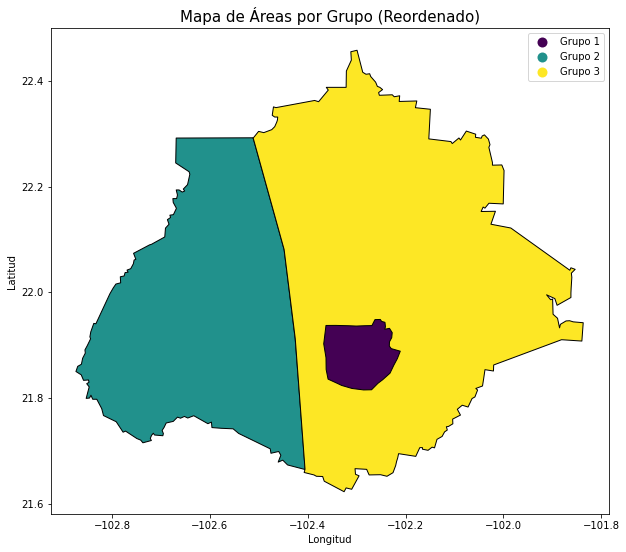

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Carga el archivo GeoJSON
geojson_path = './agsGroups.geojson'  # Asegúrate de cambiar esto por la ruta correcta del archivo
geojson_data = gpd.read_file(geojson_path)

# Reordena los datos para que el Grupo 1 se dibuje por encima de los otros grupos
unique_groups = geojson_data['name'].unique()
reordered_geojson_data = geojson_data.set_index('name').reindex(index=[g for g in unique_groups if g != 'Grupo 1'] + ['Grupo 1']).reset_index()

# Crea el mapa
fig, ax = plt.subplots(figsize=(10, 10))
reordered_geojson_data.plot(ax=ax, column='name', legend=True, cmap='viridis', edgecolor='black')

# Añade títulos y etiquetas
ax.set_title('Mapa de Estaciones por Grupo', fontsize=15)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show()